In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("dark_background")

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix

In [6]:
df = pd.read_csv("data/mid_res/data_df.csv").fillna(0)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[2:]].fillna(0), df['label'], test_size = 0.3)

rf = RandomForestClassifier(n_estimators = 8, random_state = 0, max_depth = 5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=8, random_state=0)

In [48]:
# decision_function_shape='ovo' 设置策略
# svc = svm.SVC(max_iter = 1000)
# svc.fit(X_train, y_train)

In [49]:
pred_rf = rf.predict(X_test)
# pred_svc = svc.fit(X_test)

## Evaluation

In [50]:
pred = pred_rf
print("macro score: {}\nmicro score: {}\nweighted score: {}".format(precision_score(y_test, pred, average = "macro"),
                                                                    precision_score(y_test, pred, average = "micro"),
                                                                    precision_score(y_test, pred, average = "weighted")))
confusion_matrix(y_test, pred)

macro score: 0.8123241465620353
micro score: 0.7455750187615544
weighted score: 0.7746427319989584


array([[ 5979,   777,     0,  5301,  5259,  2820,  1016],
       [  234, 27734,     0,  4879,  2729,  1983,  1135],
       [    5,  3760,  1877, 10750,  1393,     6,     0],
       [  264,  1273,     0, 59202,  1057,   706,   418],
       [  357,   567,     0,  5502, 41639,  5015,   130],
       [   25,    85,     0,  1447,  2522, 49898,   445],
       [   55,  1143,     0,  1398,  2167,  2877, 17336]])

In [51]:
rf.feature_importances_

array([4.99885548e-02, 1.33749924e-01, 1.15939609e-01, 0.00000000e+00,
       1.95559041e-01, 9.10951817e-02, 7.56040825e-02, 6.24912919e-02,
       5.89945977e-02, 9.37023611e-02, 0.00000000e+00, 1.63845973e-06,
       0.00000000e+00, 3.90451603e-07, 0.00000000e+00, 0.00000000e+00,
       2.56527775e-06, 0.00000000e+00, 9.49176405e-05, 2.16316625e-07,
       0.00000000e+00, 0.00000000e+00, 4.74870588e-02, 2.65653759e-02,
       2.61848607e-02, 1.52701749e-02, 7.26815885e-03])

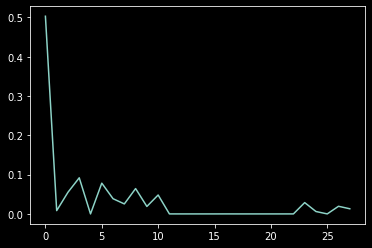

In [38]:
plt.plot(rf.feature_importances_)

In [39]:
rf.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1491434855)]

In [40]:
rf.apply(X_test).shape

(273165, 8)

In [41]:
rf.n_features_

28

In [42]:
rf.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1491434855)]

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(rf.estimators_[0], out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [44]:
list(X_train.columns)

['label',
 'accuracy',
 'num_gps',
 'num_wifi',
 'num_cells',
 'speed',
 'wifi_rssi_mode',
 'wifi_rssi_mean',
 'wifi_rssi_min',
 'wifi_rssi_max',
 'wifi_rssi_std',
 'cells_isRegistered_mean',
 'cells_asuLevel_mean',
 'cells_dbm_mean',
 'cells_level_mean',
 'cells_asuLevel_min',
 'cells_dbm_min',
 'cells_level_min',
 'cells_asuLevel_max',
 'cells_dbm_max',
 'cells_level_max',
 'cells_asuLevel_std',
 'cells_dbm_std',
 'gps_snr',
 'gps_snr_mean',
 'gps_snr_min',
 'gps_snr_max',
 'gps_snr_std']